In [1]:
# Implantando a Regressão logistica


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


dataframe = pd.read_csv("./AR_Data.csv", sep=";")
dataframe, dataframe_teste = train_test_split(dataframe, test_size=0.4, random_state=1)

classe_teste = dataframe_teste.iloc[:, 4].values
previsores_teste = dataframe_teste.iloc[:, [0,1,2,3]].values
classe = dataframe.iloc[:, 4].values
previsores = dataframe.iloc[:, [0,1,2,3]].values
print(len(previsores), len(previsores_teste))

label_encoder = LabelEncoder()
for i in range(0, 4):
    previsores[:, i] = label_encoder.fit_transform(previsores[:, i])
    previsores_teste[:, i] = label_encoder.fit_transform(previsores_teste[:, i])

scaler_data = StandardScaler()
previsores = scaler_data.fit_transform(previsores)
previsores_teste = scaler_data.fit_transform(previsores_teste)



previsores

300000 200000


array([[-0.36231603,  0.20457245, -0.47840325, -0.57406837],
       [-0.36231603,  0.20457245, -0.47840325,  0.98986654],
       [-0.36231603,  0.20457245, -0.47840325,  0.98986654],
       ...,
       [-0.36231603,  0.20457245, -0.47840325,  2.55380145],
       [-0.36231603,  0.20457245,  2.02440393,  2.55380145],
       [-0.36231603,  0.20457245, -0.47840325,  0.98986654]])

In [5]:
from sklearn.linear_model import LogisticRegression

regressao_log_aprendiz = LogisticRegression(random_state= 1, max_iter= 50)
regressao_log_aprendiz.fit(previsores, classe)
regressao_log_aprendiz.intercept_

array([0.42151308])

In [6]:
regressao_log_aprendiz.coef_

array([[-2.94381418, -0.21878439, -0.32654032, -0.32669796]])

              precision    recall  f1-score   support

    One-Time       0.42      0.90      0.58     26966
   Recurring       0.98      0.81      0.89    173034

    accuracy                           0.82    200000
   macro avg       0.70      0.85      0.73    200000
weighted avg       0.91      0.82      0.85    200000

0.821925


0.821925

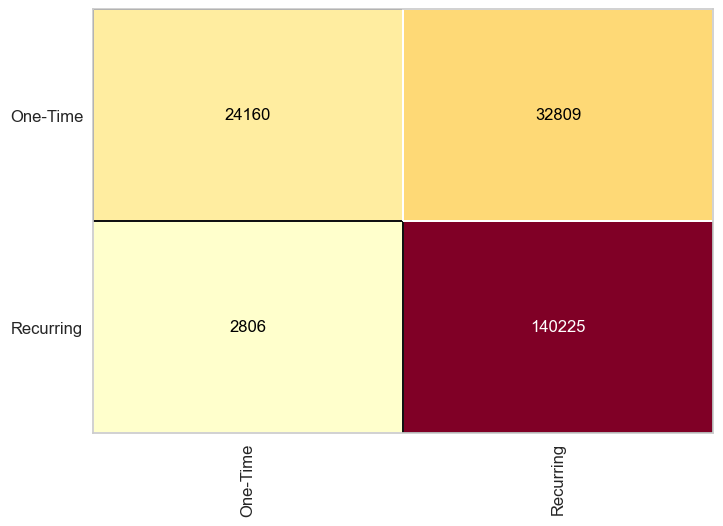

In [7]:
previsao = regressao_log_aprendiz.predict(previsores_teste)

from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

print(classification_report(previsao, classe_teste))
print(accuracy_score(previsao, classe_teste))
cm = ConfusionMatrix(regressao_log_aprendiz)
cm.fit(previsores, classe)
cm.score(previsores_teste, classe_teste)